In [43]:
import pandas as pd
import matplotlib.pyplot as plt


In [44]:
df = pd.read_csv('water.csv')

In [45]:
df

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


In [ ]:
"""Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график
Рассчитать коэффициенты корреляции Пирсона и Спирмена
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков"""

### Корреляция

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

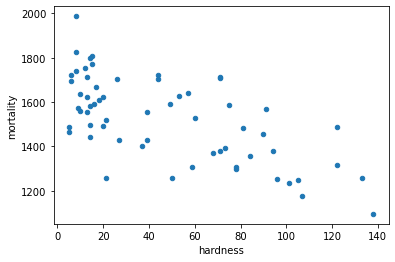

In [46]:
#визуализируем взаимосвязь жесткости воды и средней годовой смертностью
df.plot(kind='scatter', x='hardness', y='mortality')

In [31]:
#коэффициент корреляции Пирсона
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [32]:
#коэффициент корреляции Спирмена
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


### Регрессия

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [34]:
X = df[['hardness']]
y = df['mortality']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [50]:
# обучение
model = LinearRegression()
model.fit(X_train, y_train)  

LinearRegression()

In [51]:
model.coef_

array([-2.86283532])

In [52]:
model.intercept_

1673.2852429956388

In [53]:
y_pred = model.predict(X_test)
y_pred

array([1415.63006463, 1621.75420732, 1533.00631255, 1501.51512409,
       1613.16570138, 1650.38256047, 1644.65688984, 1547.32048913,
       1449.98408841, 1644.65688984, 1372.6875349 , 1658.97106642,
       1464.29826499, 1366.96186427, 1638.93121921, 1384.13887616,
       1627.47987795, 1613.16570138, 1398.45305274])

In [54]:
#сравнение прогнозов и фактов
res_df = X_test.copy()

res_df['y_pred'] = y_pred
res_df['y_test'] = y_test
res_df

,hardness,y_pred,y_test
39,90,1415.630065,1456
4,18,1621.754207,1609
44,49,1533.006313,1591
56,60,1501.515124,1527
12,21,1613.165701,1519
45,8,1650.382560,1987
5,10,1644.656890,1558
31,44,1547.320489,1702
13,78,1449.984088,1307
8,10,1644.656890,1637


In [55]:
# коэффициент детерминации
model.score(X_test,y_test) 

0.4380013020325193

In [57]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [62]:
# надо добавить константу
X_const = sm.add_constant(X_train) 

In [86]:
model = sm.OLS(y_train, X_const)
results = model.fit()

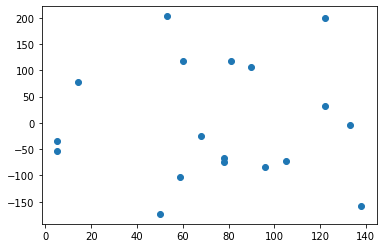

In [87]:
# график остатков
plt.scatter(X_const.iloc[:, 1], results.resid)

## Вывод
### Обратная зависимость между жесткостью воды и средней годовой смертностью заметной силы, т.к. коэффициенты корреляции < 0,7 и < 0, коэффициент детерминации 0,438-регрессионая модель имеет низкое практическое значение.

In [ ]:
"""Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности"""

In [67]:
#разделим данные на 2 группы - южные и северные города
df_s = df.loc[df['location'] == 'South']

df_s

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73
12,13,South,Cardiff,1519,21
13,14,South,Coventry,1307,78
14,15,South,Croydon,1254,96
18,19,South,East Ham,1318,122
19,20,South,Exeter,1260,21


In [69]:
df_n = df.loc[df['location'] == 'North']

df_n

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15
8,9,North,Bradford,1637,10
11,12,North,Burnley,1755,12
15,16,North,Darlington,1491,20
16,17,North,Derby,1555,39
17,18,North,Doncaster,1428,39


### Южные города

### Корреляция

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

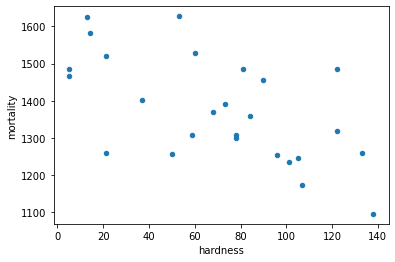

In [71]:
#визуализируем взаимосвязь жесткости воды и средней годовой смертностью в южных городах
df_s.plot(kind='scatter', x='hardness', y='mortality')

In [72]:
#коэффициент корреляции Пирсона
df_s[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [73]:
#коэффициент корреляции Спирмена
df_s[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


### Регрессия

In [75]:
X = df_s[['hardness']]
y = df_s['mortality']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [77]:
#обучение 
model = LinearRegression()
model.fit(X_train, y_train)  

LinearRegression()

In [78]:
y_pred = model.predict(X_test)
y_pred

array([1315.98808395, 1384.18016237, 1456.38353953, 1328.02198014,
       1504.5191243 , 1362.11801935, 1488.47392938, 1488.47392938])

In [79]:
#сравнение прогнозов и фактов
res_df = X_test.copy()

res_df['y_pred'] = y_pred
res_df['y_test'] = y_test
res_df

,hardness,y_pred,y_test
37,107,1315.988084,1175
10,73,1384.180162,1392
27,37,1456.383540,1402
41,101,1328.021980,1236
54,13,1504.519124,1625
9,84,1362.118019,1359
19,21,1488.473929,1260
12,21,1488.473929,1519


In [80]:
#коэффициент детерминации
model.score(X_test,y_test)  

0.36899759938949295

In [81]:
X_const = sm.add_constant(X_train) 

In [84]:
#обучение
model = sm.OLS(y_train, X_const)
results = model.fit()

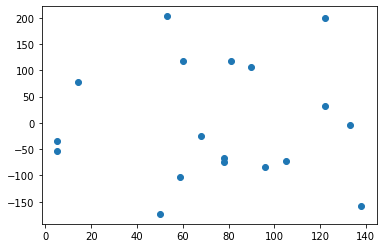

In [85]:
# график остатков
plt.scatter(X_const.iloc[:, 1], results.resid)

## Вывод 
### Обратная зависимость между жесткостью воды и средней годовой смертностью заметной силы в южных городах, т.к. коэффициенты корреляции < 0,7 и < 0, коэффициент детерминации 0,368-регрессионая модель имеет низкое практическое значение.

### Северные города

### Корреляция

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

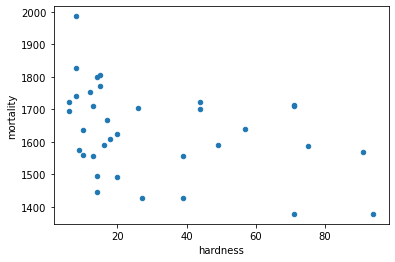

In [89]:
#визуализируем взаимосвязь жесткости воды и средней годовой смертностью в южных городах
df_n.plot(kind='scatter', x='hardness', y='mortality')

In [91]:
#коэффициент корреляции Пирсона
df_n[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [92]:
#коэффициент корреляции Спирмена
df_n[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


### Регрессия

In [93]:
X = df_n[['hardness']]
y = df_n['mortality']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [95]:
model = LinearRegression()
model.fit(X_train, y_train) 

LinearRegression()

In [96]:
y_pred = model.predict(X_test)
y_pred

array([1536.34370503, 1562.88818681, 1656.49241202, 1655.09533403,
       1659.28656799, 1642.52163214, 1629.94793024, 1568.47649876,
       1606.19760444, 1656.49241202, 1613.18299438])

In [97]:
# сравнение прогнозов и фактов
res_df = X_test.copy()

res_df['y_pred'] = y_pred
res_df['y_test'] = y_test
res_df

,hardness,y_pred,y_test
21,94,1536.343705,1379
49,75,1562.888187,1587
45,8,1656.492412,1987
23,9,1655.095334,1574
36,6,1659.286568,1724
4,18,1642.521632,1609
35,27,1629.947930,1427
53,71,1568.476499,1709
31,44,1606.197604,1702
29,8,1656.492412,1828


In [98]:
#коэффициент детерминации
model.score(X_test,y_test) 

0.16903437385498565

In [99]:
X_const = sm.add_constant(X_train) 

In [100]:
model = sm.OLS(y_train, X_const)
results = model.fit()

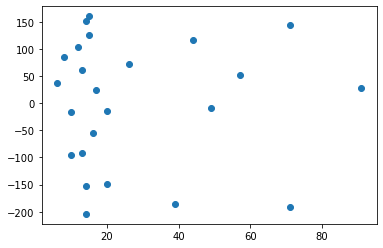

In [101]:
# график остатков
plt.scatter(X_const.iloc[:, 1], results.resid)

## Вывод
### Обратная зависимость между жесткостью воды и средней годовой смертностью умеренной силы в северных городах, т.к. коэффициенты корреляции < 0,5 и < 0, коэффициент детерминации 0,169-регрессионая модель не имеет практического значения.
